# Marketing Campaign Data Science

## Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from matplotlib.rcsetup import Colormap
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from webcolors import CSS3_HEX_TO_NAMES , hex_to_rgb
from sklearn.metrics import f1_score
from webcolors import rgb_to_name
from scipy.spatial import KDTree
import warnings
import xgboost as xgb


warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('Sales.csv')
df1 = df.copy()
df1

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,TX1463,SWEATSHIRTS,TRAINING,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,PC6383,SHOES,FOOTBALL GENERIC,9.90,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,VT7698,SHOES,INDOOR,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,0
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,FG2965,HARDWARE ACCESSORIES,RUNNING,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0


##EDA

In [ ]:
#drop duplictaes
df1 = df1.drop_duplicates()

In [ ]:
df1

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,TX1463,SWEATSHIRTS,TRAINING,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,PC6383,SHOES,FOOTBALL GENERIC,9.90,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,VT7698,SHOES,INDOOR,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,0
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,FG2965,HARDWARE ACCESSORIES,RUNNING,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0


In [ ]:
#explore the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [ ]:
df1.describe

<bound method NDFrame.describe of        country article  sales  regular_price  current_price     ratio  \
0      Germany  YN8639     28           5.95           3.95  0.663866   
1      Germany  YN8639     28           5.95           3.95  0.663866   
2      Germany  YN8639     28           5.95           3.95  0.663866   
3      Germany  YN8639     28           5.95           3.95  0.663866   
4      Germany  YN8639     28           5.95           3.95  0.663866   
...        ...     ...    ...            ...            ...       ...   
99995  Germany  PW6278    227          57.95          26.95  0.465056   
99996  Germany  PW6278    227          57.95          26.95  0.465056   
99997  Germany  PW6278    227          57.95          26.95  0.465056   
99998  Germany  PW6278    227          57.95          26.95  0.465056   
99999  Germany  PW6278    227          57.95          26.95  0.465056   

       retailweek  promo1  promo2  customer_id article.1  \
0      2016-03-27       0    

In [ ]:
#check nulls
df1.isnull().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

In [ ]:
#Data Correlation
df1.corr()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
sales,1.000000e+00,5.175875e-03,-1.205093e-01,-2.704180e-01,1.148382e-01,-2.480468e-03,-9.034924e-04,-2.929382e-18,4.545262e-16,7.730616e-17,1.097346e-16,1.766546e-16,4.656323e-17,1.916328e-16,-0.116651
regular_price,5.175875e-03,1.000000e+00,8.409200e-01,-4.321212e-02,-3.695493e-03,1.314716e-03,1.399264e-02,1.229574e-17,-2.581730e-16,1.878813e-17,-6.454673e-17,-3.200812e-16,-2.215911e-16,-6.570035e-17,-0.015027
current_price,-1.205093e-01,8.409200e-01,1.000000e+00,4.127533e-01,5.966158e-02,1.657370e-02,1.947868e-02,2.726772e-18,-2.705198e-16,1.084192e-16,-1.106159e-16,-5.544430e-16,-4.156394e-16,-8.639914e-17,0.183402
ratio,-2.704180e-01,-4.321212e-02,4.127533e-01,1.000000e+00,1.443172e-01,3.511546e-02,1.017980e-02,-2.851908e-18,-2.743519e-16,-5.070546e-17,-9.958338e-17,-3.624401e-16,1.103201e-16,-2.094732e-16,0.447122
promo1,1.148382e-01,-3.695493e-03,5.966158e-02,1.443172e-01,1.000000e+00,4.734652e-02,6.278713e-03,-1.507672e-17,1.448207e-16,9.497750e-17,-2.577039e-17,5.113318e-18,-7.841475e-16,2.292994e-16,0.064105
promo2,-2.480468e-03,1.314716e-03,1.657370e-02,3.511546e-02,4.734652e-02,1.000000e+00,9.797080e-03,8.109669e-18,-5.923813e-16,-2.043189e-16,-1.718655e-16,-2.060884e-16,2.577079e-16,-3.401877e-16,0.020165
customer_id,-9.034924e-04,1.399264e-02,1.947868e-02,1.017980e-02,6.278713e-03,9.797080e-03,1.000000e+00,3.064215e-17,-3.712224e-16,-5.671916e-17,-6.053696e-17,-5.792952e-17,6.470377e-16,-1.812246e-16,0.004006
cost,-2.929382e-18,1.229574e-17,2.726772e-18,-2.851908e-18,-1.507672e-17,8.109669e-18,3.064215e-17,1.000000e+00,4.829037e-03,-7.337551e-01,-1.102127e-01,-1.785002e-01,1.189099e-01,2.400004e-02,0.002130
rgb_r_main_col,4.545262e-16,-2.581730e-16,-2.705198e-16,-2.743519e-16,1.448207e-16,-5.923813e-16,-3.712224e-16,4.829037e-03,1.000000e+00,2.278015e-01,-5.307091e-01,5.864479e-01,1.695861e-02,3.448846e-01,-0.001328
rgb_g_main_col,7.730616e-17,1.878813e-17,1.084192e-16,-5.070546e-17,9.497750e-17,-2.043189e-16,-5.671916e-17,-7.337551e-01,2.278015e-01,1.000000e+00,1.730695e-01,3.742056e-01,-1.230575e-01,8.089808e-02,-0.007542


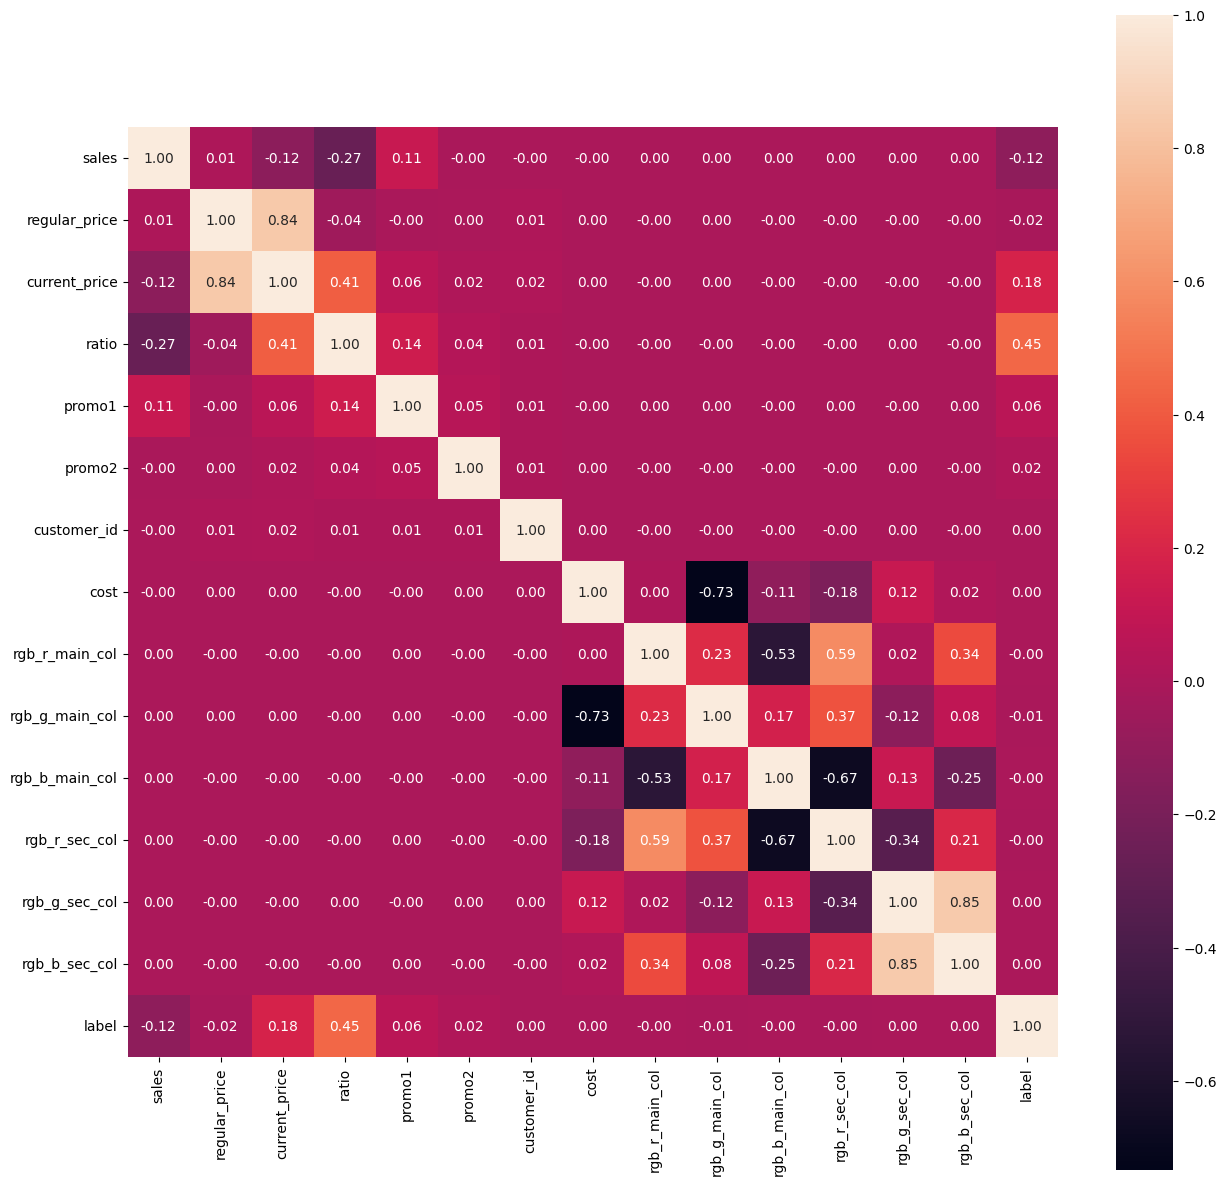

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))  
dataplot = sns.heatmap(df1.corr(),square=True,cbar=True,ax=ax,annot=True,fmt='.2f')

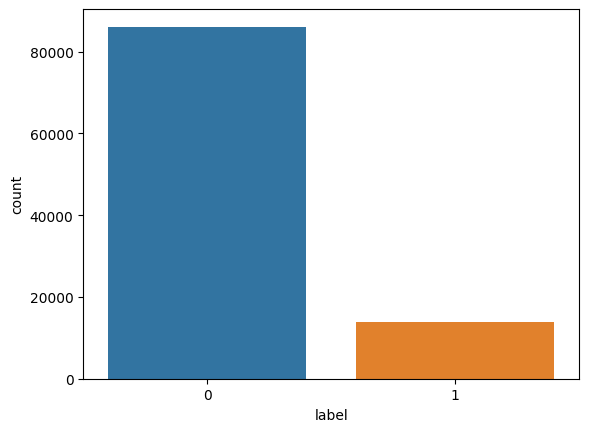

In [ ]:
#check if data is balanced or not
data_balance = sns.countplot(x=df1['label'],data=df1)
#data is not balanced

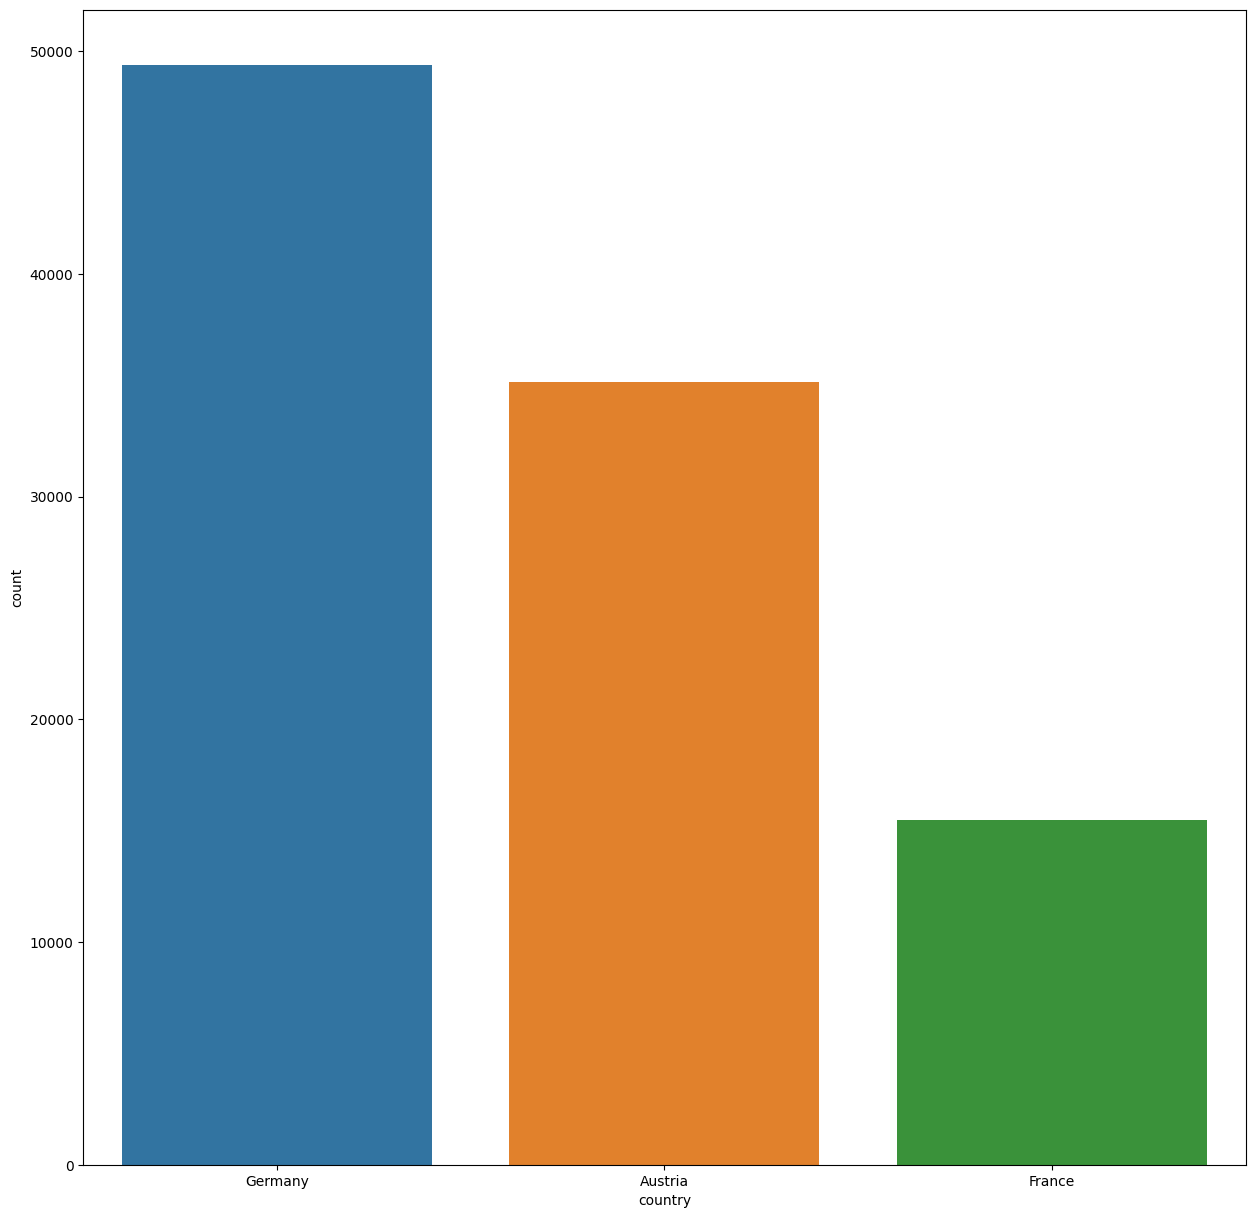

In [ ]:
#some visuals and insights of the data
fig, ax = plt.subplots(figsize=(15,15))  
countrey = sns.countplot(x=df1['country'],data=df1,ax=ax)

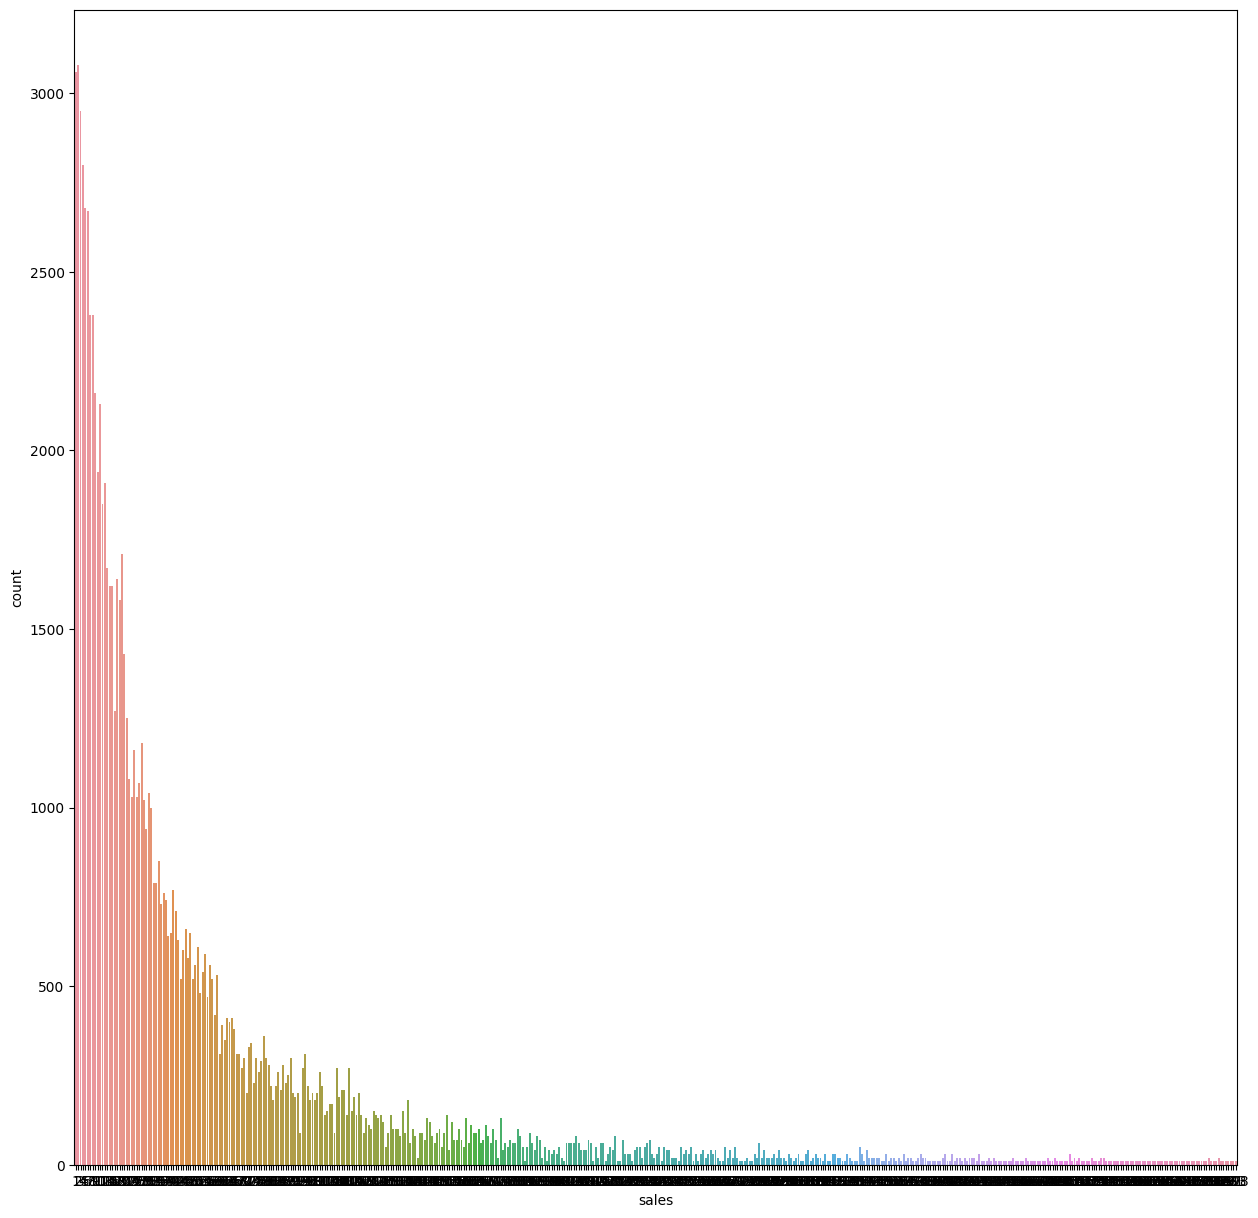

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))  
countrey = sns.countplot(x=df1['sales'],data=df1,ax=ax)

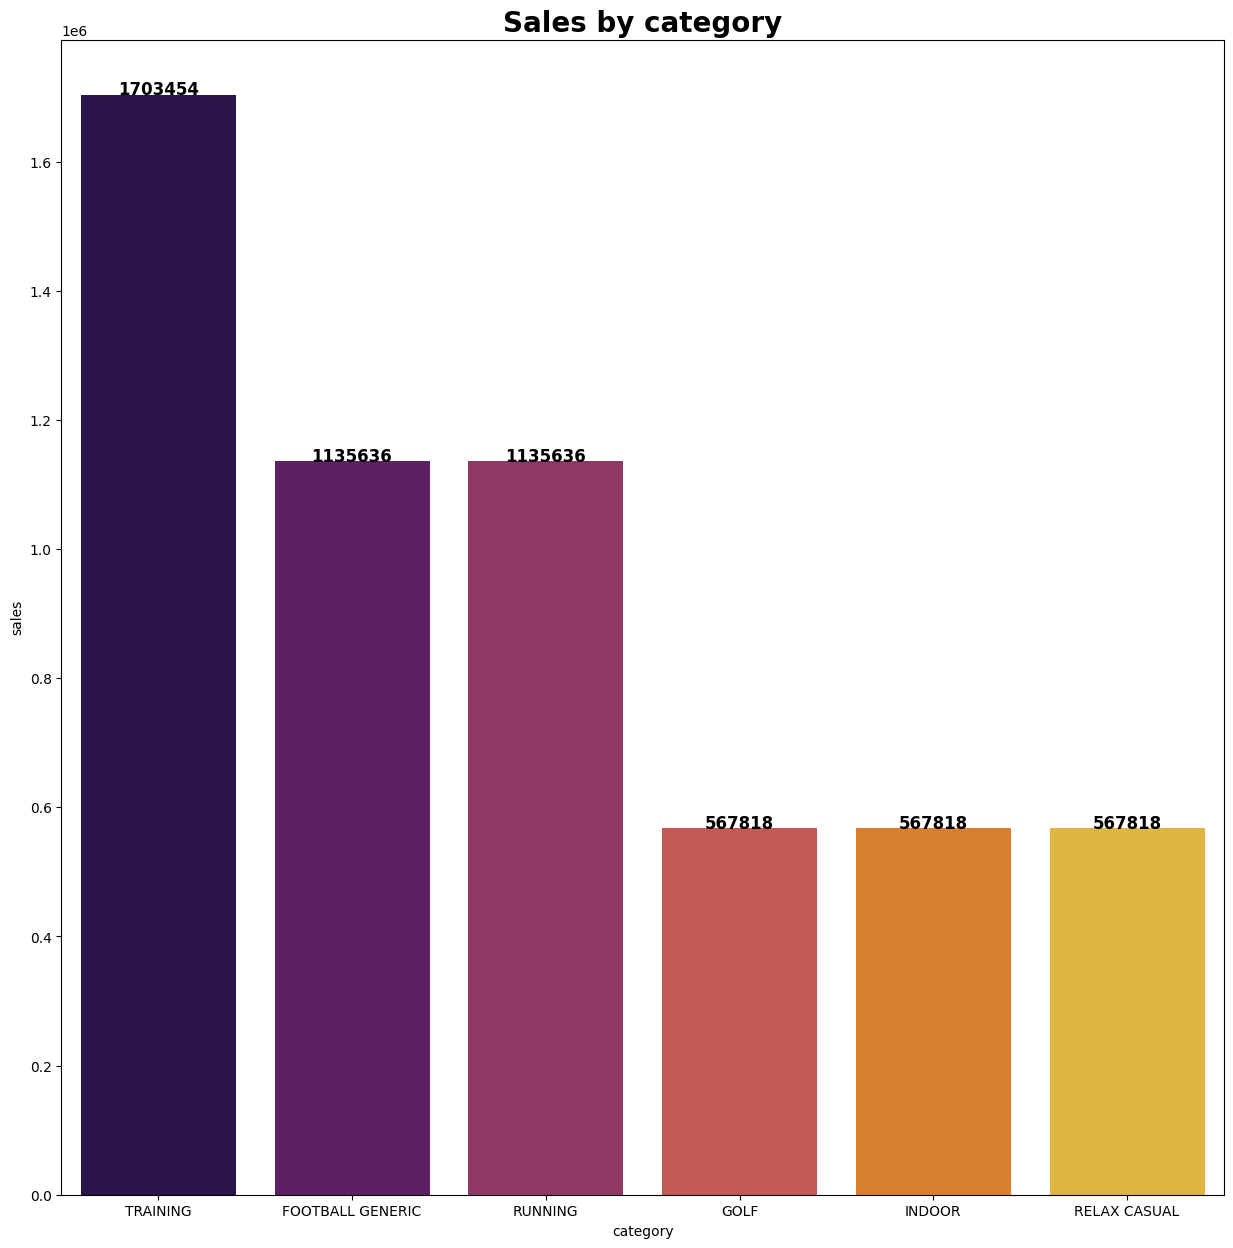

In [ ]:
df2 = df1.groupby(by = 'category',as_index = False)[['sales']].sum().sort_values(by = ['sales'], ascending = False)
#,color = 'blue'
fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(data = df2, x = 'category', y = 'sales', ax = ax, palette='inferno')
plt.title('Sales by category',size = 20,weight = 'heavy')
for i,v in enumerate(df2['sales']):
  plt.text(i,v + 2,str(v),ha = 'center', weight = 'bold',size = 12)

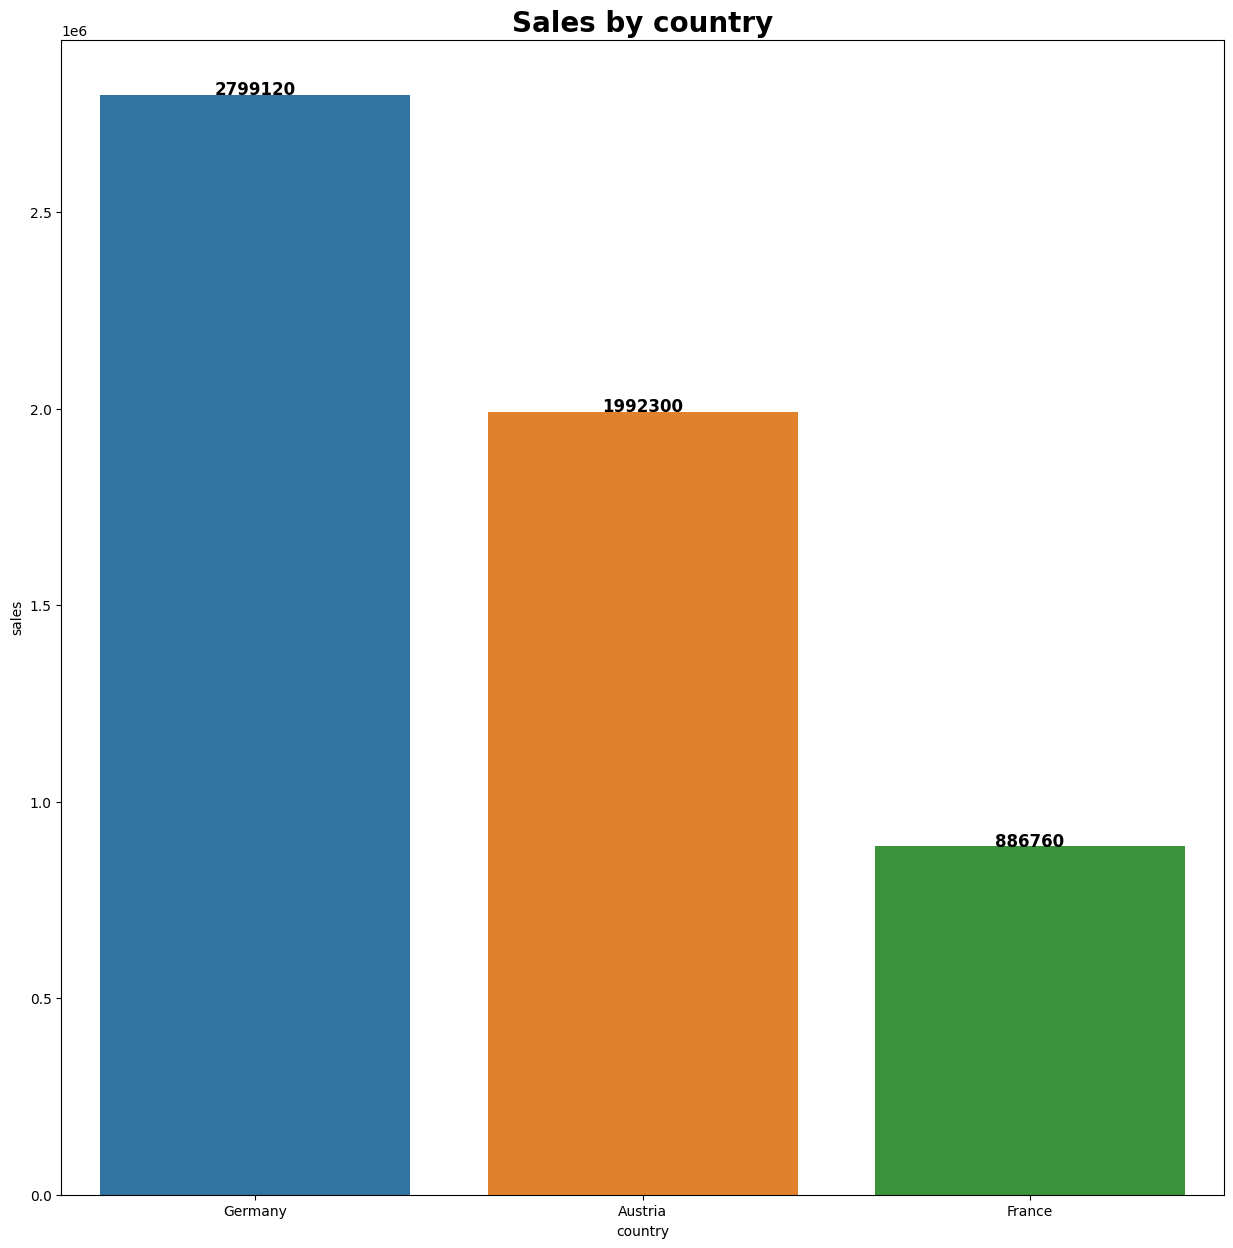

In [ ]:
df2 = df1.groupby(by = 'country',as_index = False)[['sales']].sum().sort_values(by = ['sales'], ascending = False)

fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(data = df2, x = 'country', y = 'sales', ax = ax)
plt.title('Sales by country',size = 20,weight = 'heavy')
for i,v in enumerate(df2['sales']):
  plt.text(i,v + 2,str(v),ha = 'center', weight = 'bold',size = 12)

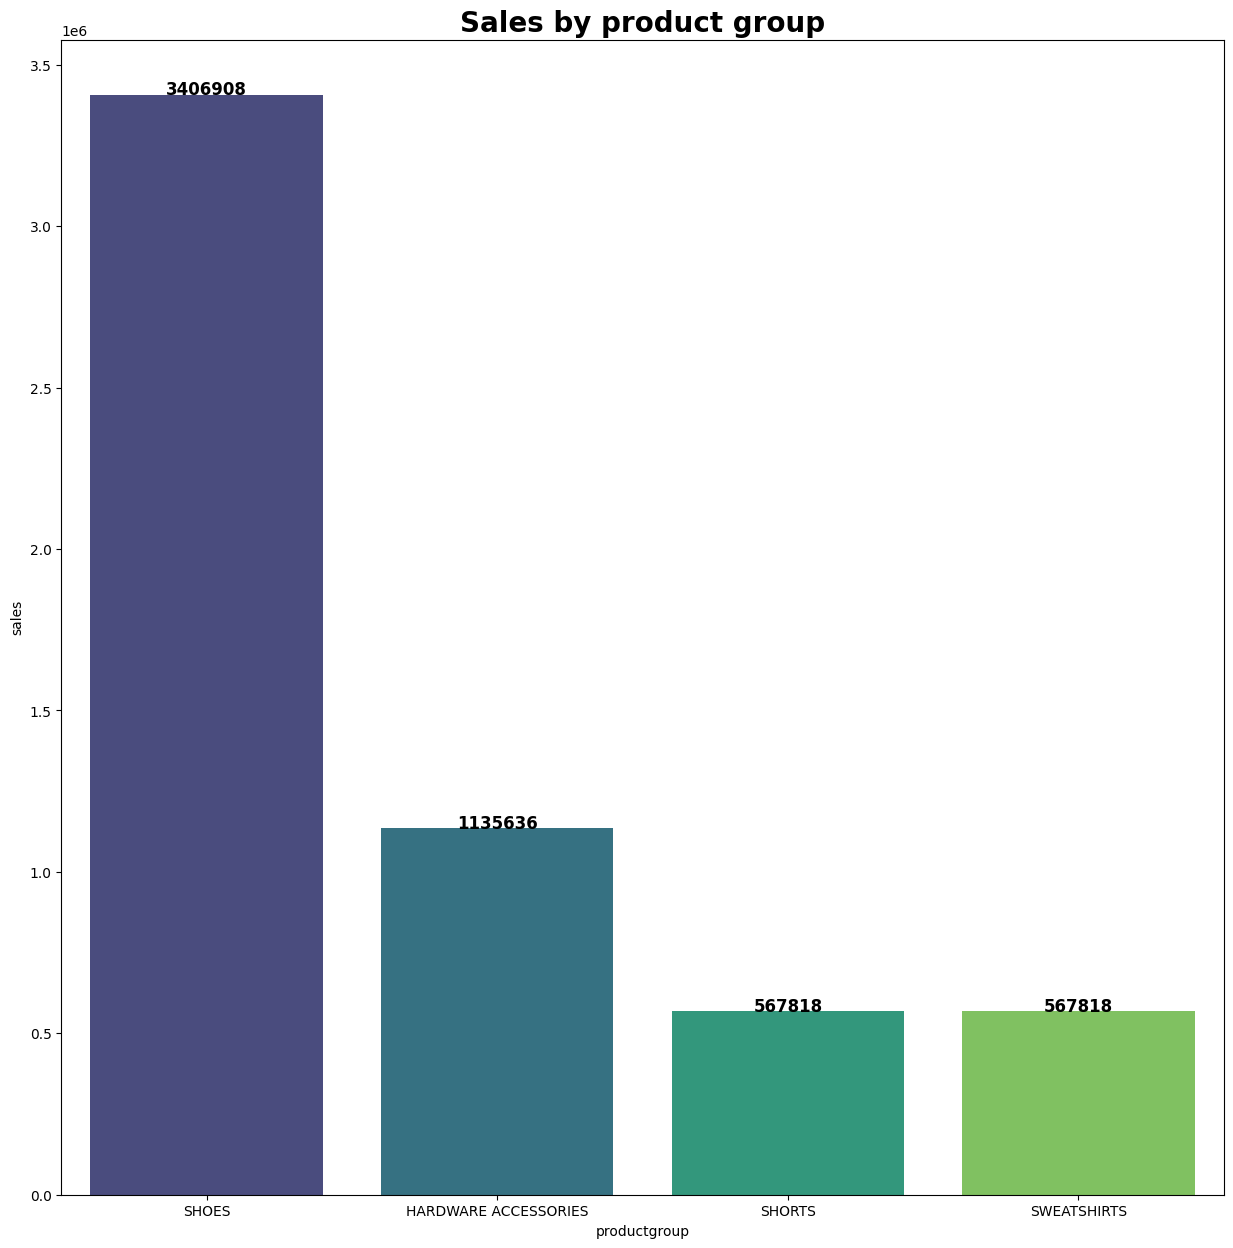

In [ ]:
df2 = df1.groupby(by = 'productgroup',as_index = False)[['sales']].sum().sort_values(by = ['sales'], ascending = False)

fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(data = df2, x = 'productgroup', y = 'sales',palette= 'viridis', ax = ax)
plt.title('Sales by product group',size = 20,weight = 'heavy')
for i,v in enumerate(df2['sales']):
  plt.text(i,v + 2,str(v),ha = 'center', weight = 'bold',size = 12)

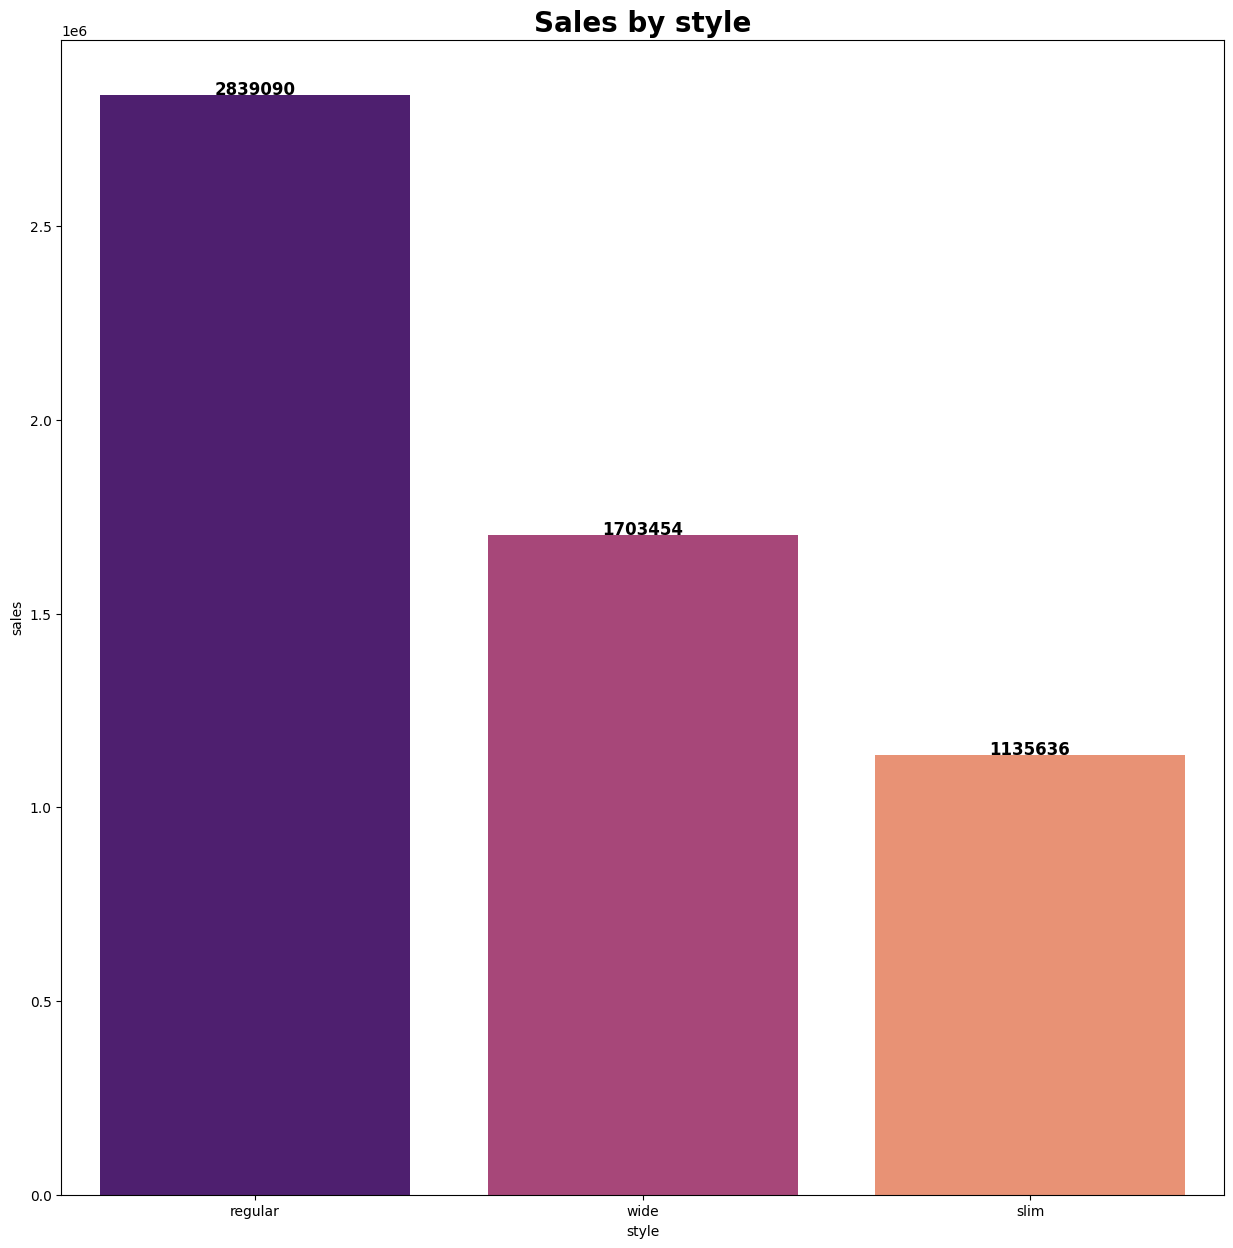

In [ ]:
df2 = df1.groupby(by = 'style',as_index = False)[['sales']].sum().sort_values(by = ['sales'], ascending = False)

fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(data = df2, x = 'style', y = 'sales',palette= 'magma', ax = ax)
plt.title('Sales by style',size = 20,weight = 'heavy')
for i,v in enumerate(df2['sales']):
  plt.text(i,v + 2,str(v),ha = 'center', weight = 'bold',size = 12)

<Axes: xlabel='ratio'>

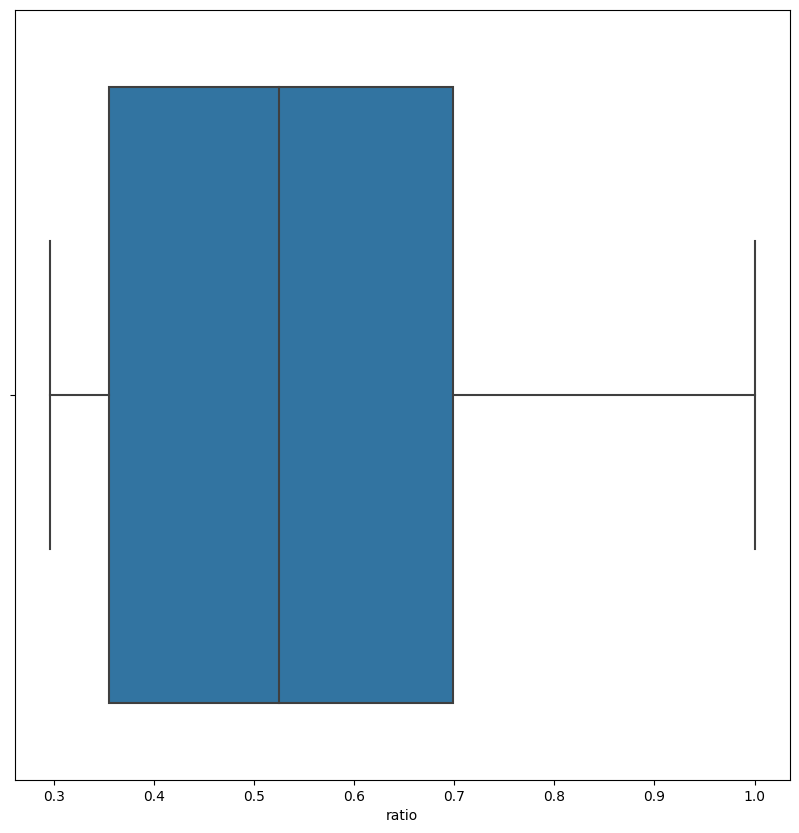

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='ratio',data=df1)

##Data Preparartion

In [ ]:
#converting the 6 columns(3 for each color) to only two columns of colors
#this function does the job
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]

In [ ]:
convert_rgb_to_names((255,150,130))

'lightsalmon'

In [ ]:
#setting all numbers into colors

set_color_primary=[]
set_color_secondary=[]

for i in range(len(df1)):
  set_color_primary.append(convert_rgb_to_names(tuple([df1['rgb_r_main_col'][i],df1['rgb_g_main_col'][i],df1['rgb_b_main_col'][i]])))
  set_color_secondary.append(convert_rgb_to_names(tuple([df1['rgb_r_sec_col'][i],df1['rgb_g_sec_col'][i],df1['rgb_b_sec_col'][i]])))

df1['color_1']=set_color_primary
df1['color_2']=set_color_secondary




In [ ]:
df1['article.1'].value_counts()

OC6355    10000
AP5568    10000
CB8861    10000
LI3529    10000
GG8661    10000
TX1463    10000
PC6383    10000
VT7698    10000
FG2965    10000
AC7347    10000
Name: article.1, dtype: int64

In [ ]:
df1['color_1'].value_counts()

chocolate       10000
darkkhaki       10000
goldenrod       10000
rosybrown       10000
blueviolet      10000
steelblue       10000
brown           10000
lightskyblue    10000
silver          10000
gray            10000
Name: color_1, dtype: int64

In [ ]:
df1

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,color_1,color_2
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,chocolate,lavender
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,darkkhaki,lavender
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,goldenrod,lavender
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,rosybrown,lightblue
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,blueviolet,lightblue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,TX1463,SWEATSHIRTS,TRAINING,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0,steelblue,lightblue
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,PC6383,SHOES,FOOTBALL GENERIC,9.90,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0,brown,rosybrown
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,VT7698,SHOES,INDOOR,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,0,lightskyblue,rosybrown
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,FG2965,HARDWARE ACCESSORIES,RUNNING,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0,silver,rosybrown


In [ ]:
#saving the data with colors for visualisation with tableau
df1.to_csv("final_test_data.csv")

In [ ]:
#droping all unnecessary columns including IDs columns and the number colors columns as we replaced them with the two columns color_1 and color_2
#dropped 'regular_price' and 'ratio' columns and left the 'current_price'(as the 'current_price' describes the price after discount ) 
df1 = df1.drop(columns = ['article','article.1', 'customer_id', 'regular_price', 'ratio', 'sizes', 'rgb_r_main_col', 'rgb_g_main_col' , 'rgb_b_main_col' , 'rgb_r_sec_col' , 'rgb_g_sec_col' , 'rgb_b_sec_col' ] , axis = 1)

In [ ]:
df1['retailweek'].value_counts()

2015-11-22    1100
2016-12-25    1050
2015-09-27    1010
2016-05-15     980
2015-05-10     960
              ... 
2016-04-03     660
2016-10-30     650
2016-08-07     650
2017-03-19     640
2017-03-26     600
Name: retailweek, Length: 123, dtype: int64

In [ ]:
df1 = df1.drop(columns = ['retailweek'] , axis = 1)

In [ ]:
objList = df1.select_dtypes(include = "object").columns
print (objList)

Index(['country', 'productgroup', 'category', 'style', 'gender', 'color_1',
       'color_2'],
      dtype='object')


In [ ]:
#encoding the object columns we left up
le = LabelEncoder()

for feat in objList:
    df1[feat] = le.fit_transform(df1[feat].astype(str))

In [ ]:
#split data into features and label
X = df1.drop(columns = 'label' , axis = 1)
Y = df1['label']

In [ ]:
X

,country,sales,current_price,promo1,promo2,productgroup,category,cost,style,gender,color_1,color_2
0,2,28,3.95,0,0,1,5,13.29,1,3,2,0
1,2,28,3.95,0,0,2,5,2.29,0,3,3,0
2,2,28,3.95,0,0,0,1,1.70,0,3,4,0
3,2,28,3.95,0,0,1,4,9.00,0,0,7,1
4,2,28,3.95,0,0,1,3,9.60,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,227,26.95,0,0,3,5,4.20,2,3,9,1
99996,2,227,26.95,0,0,1,0,9.90,2,2,1,2
99997,2,227,26.95,0,0,1,2,5.20,2,3,6,2
99998,2,227,26.95,0,0,0,4,1.29,1,3,8,2


In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: label, Length: 100000, dtype: int64

In [ ]:
 #upsampling data with somte(as it is more accurate tha the random over sampler)
 smote = SMOTE(random_state = 42, k_neighbors=20)
 x_balanced, y_balanced = smote.fit_resample(X, Y)

In [ ]:
# oversample = RandomOverSampler(sampling_strategy='minority')
# x_balanced, y_balanced = oversample.fit_resample(X, Y)

In [ ]:
x_balanced

,country,sales,current_price,promo1,promo2,productgroup,category,cost,style,gender,color_1,color_2
0,2,28,3.950000,0,0,1,5,13.290000,1,3,2,0
1,2,28,3.950000,0,0,2,5,2.290000,0,3,3,0
2,2,28,3.950000,0,0,0,1,1.700000,0,3,4,0
3,2,28,3.950000,0,0,1,4,9.000000,0,0,7,1
4,2,28,3.950000,0,0,1,3,9.600000,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
172139,1,31,36.002388,0,0,1,5,13.290000,1,3,2,0
172140,2,15,79.712989,0,0,1,0,8.700000,0,1,5,2
172141,0,12,20.138698,0,0,1,0,8.700000,0,1,5,2
172142,0,43,76.950000,0,0,1,1,6.856483,2,2,4,2


In [ ]:
y_balanced

0         0
1         0
2         0
3         0
4         0
         ..
172139    1
172140    1
172141    1
172142    1
172143    1
Name: label, Length: 172144, dtype: int64

In [ ]:
#splitting the data into training and testing samples
x_train , x_test , y_train , y_test = train_test_split(x_balanced, y_balanced, test_size = 0.2, random_state = 42)

##Data Modeling

###KNN

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn_pred = knn.predict(x_test)

In [ ]:
knn.score(x_test , y_test)

0.747277004850562

In [ ]:
#knn accuracy is not that much compared to the other classefiers but it do get higher accuracy with the random over sampler(overfitting as the data is duplicated in random over sampler)
f1_score(y_test, knn_pred)

0.7494312455003599

###Decision Tree

In [ ]:
#Decision Tree

# class_1=len(df1[df1['label']==1]) / len(df1)
# class_weight= {0:1-class_1,1:float(class_1)}
clf=DecisionTreeClassifier()#class_weight= class_weight )
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred = clf.predict(x_test)

In [ ]:
clf.score(x_test , y_test)

0.8304046007726045

In [ ]:
#DT accuracy is higher than KNN and Random Forest but it do get higher accuracy with the random over sampler(overfitting as the data is duplicated in random over sampler)
f1_score(y_test, pred)

0.8277530310628631

###Random Forest

In [ ]:
#Random Forest
rf = RandomForestClassifier(n_estimators = 50, random_state = 42, max_depth=20, max_leaf_nodes=500,max_features=12)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_features=12, max_leaf_nodes=500,
                       n_estimators=50, random_state=42)

In [ ]:
pred = rf.predict(x_test)

In [ ]:
rf.score(x_test , y_test)

0.8069650585262425

In [ ]:
#Random Forest accuracy is higher than DT but it do get higher accuracy with the random over sampler(overfitting as the data is duplicated in random over sampler)
f1_score(y_test, pred)

0.8081741037926455

###XGBoosting

In [ ]:
#training matrix
dtrain_clf = xgb.DMatrix(x_train, y_train, enable_categorical=True)
#testing matrix
dtest_clf = xgb.DMatrix(x_test, y_test, enable_categorical=True)

In [ ]:
params = {"objective": "multi:softprob", "tree_method": "auto", "num_class": 2}

results = xgb.cv( params, dtrain_clf, num_boost_round=1000,nfold=5,metrics=["mlogloss", "auc", "merror"] )

In [ ]:
results.keys()

Index(['train-mlogloss-mean', 'train-mlogloss-std', 'train-auc-mean',
       'train-auc-std', 'train-merror-mean', 'train-merror-std',
       'test-mlogloss-mean', 'test-mlogloss-std', 'test-auc-mean',
       'test-auc-std', 'test-merror-mean', 'test-merror-std'],
      dtype='object')

In [ ]:
results['train-auc-mean'].max()

0.9825238566771313

In [ ]:
#XGBoosting got the higher accuracy of all classifiers with the smote over sampler
results['test-auc-mean'].max()

0.945911307193802